                                                    Author: Akshat Gupta

## Project : Sample Superstore Recency, Frequency, Monetary Analysis | Model used : RFM Analysis
### This analysis involves performing RFM analysis on Sample Superstore data to identify different segements of customers based on their recency, frequency and monetary value.
### RFM analysis is a marketing technique used to quantitatively rank and group customers based on their buying behavior. This segmentation will help in identifying high-value customers, understand customer loyalty, and tailor marketing strategies accordingly.

In [1]:
# importing required libraries ti perform analysis
import numpy as np
import pandas as pd
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
data = pd.read_excel(r"C:\Users\aksha\OneDrive\Desktop\GT Project\RFM\RFM\Sample - Superstore.xls")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
data.shape

(9994, 21)

In [6]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
data.duplicated().sum()

0

# Exploratory Data Analysis

In [10]:
# Range of transactions
min_date = data['Order Date'].dt.date.min()
max_date = data['Order Date'].dt.date.max()
print(f"Time range of transaction is from {min_date} to {max_date}. ")

Time range of transaction is from 2014-01-03 to 2017-12-30. 


In [11]:
# Unique customers
data['Customer ID'].nunique()

793

In [12]:
# total quantity ordered
print(f"Total Quantity Ordered : {data['Quantity'].sum()}")

Total Quantity Ordered : 37873


In [13]:
# Total Sales in dollars
print(f"Total sales : ${data['Sales'].sum()}")

Total sales : $2297200.8603000003


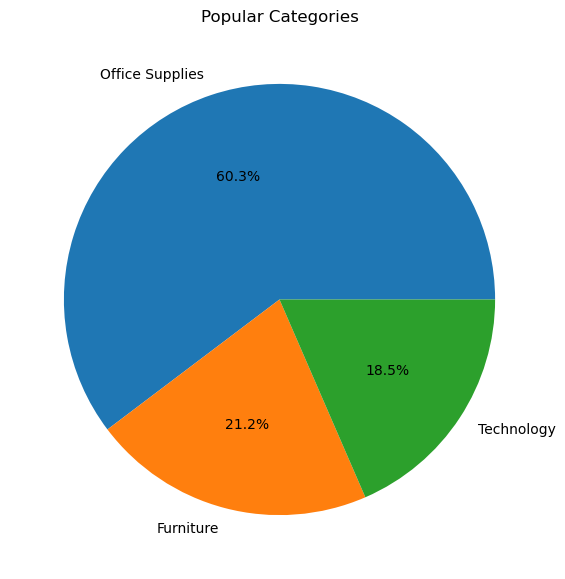

In [14]:
Popular_Categories = data['Category'].value_counts()
# Plotting Popular Categories
plt.figure(figsize=(10, 7))
plt.pie(Popular_Categories, labels=Popular_Categories.index, autopct='%1.1f%%')
plt.title('Popular Categories')
plt.show()

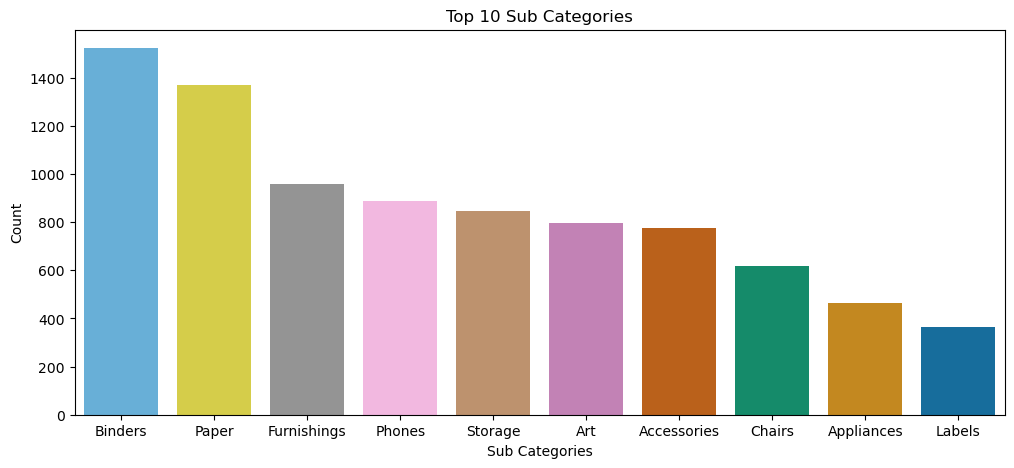

In [15]:
Top_10_Sub_Categories = data['Sub-Category'].value_counts().nlargest(10)
# Plotting the top sub categories
plt.figure(figsize=(12, 5))
sns.barplot(x=Top_10_Sub_Categories.index, y=Top_10_Sub_Categories.values, hue = Top_10_Sub_Categories,  palette = 'colorblind', legend=False)
plt.xlabel('Sub Categories')
plt.ylabel('Count')
plt.title('Top 10 Sub Categories')
plt.show()

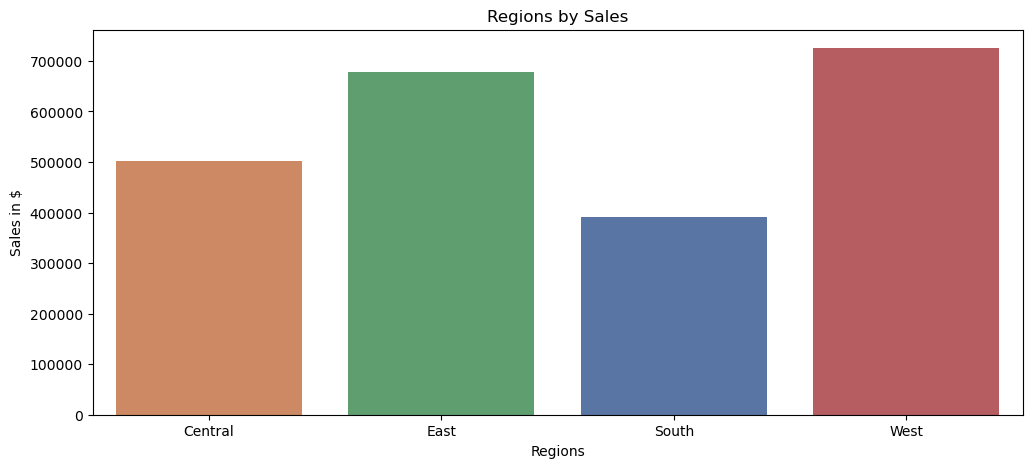

In [16]:
region_sales = data.groupby('Region')['Sales'].sum()
plt.figure(figsize=(12, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, hue = region_sales,  palette = 'deep', legend=False)
plt.xlabel('Regions')
plt.ylabel('Sales in $')
plt.title('Regions by Sales')
plt.show()

In [17]:
city_sales = data.groupby('City')['Sales'].sum()
Top_10_Cities = city_sales.nlargest(10)

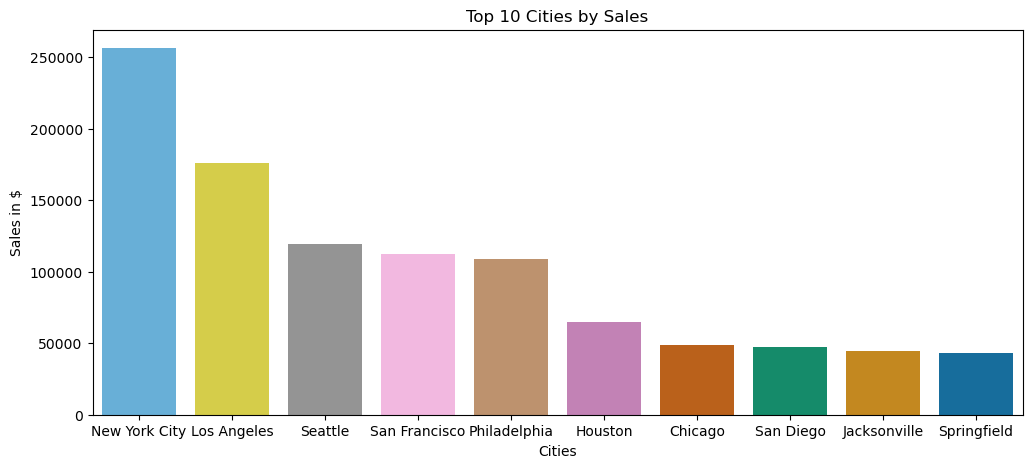

In [18]:
plt.figure(figsize=(12, 5))
sns.barplot(x=Top_10_Cities.index, y=Top_10_Cities.values, hue = Top_10_Cities,  palette = 'colorblind', legend=False)
plt.xlabel('Cities')
plt.ylabel('Sales in $')
plt.title('Top 10 Cities by Sales')
plt.show()

In [19]:
customers = data.groupby('Customer ID')['Sales'].sum()
Top_customers = customers.nlargest(10)

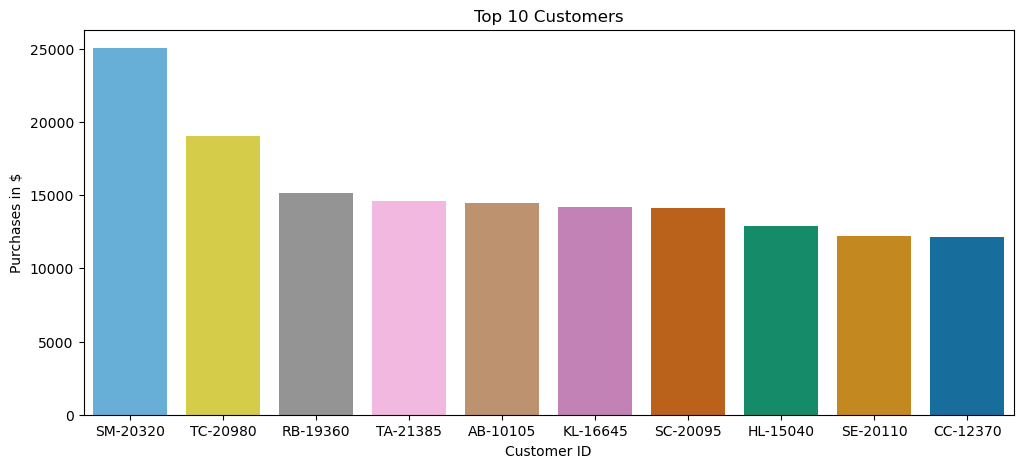

In [20]:
plt.figure(figsize=(12, 5))
sns.barplot(x=Top_customers.index, y=Top_customers.values, hue = Top_customers,  palette = 'colorblind', legend=False)
plt.xlabel('Customer ID')
plt.ylabel('Purchases in $')
plt.title('Top 10 Customers')
plt.show()

# Customer Segmentation using Recency, Frequency and Monetary Analysis

### Recency: How recently a customer made a purchase.

In [21]:
# Recency
day = pd.to_datetime(max_date)
recency = data.groupby(['Customer ID']).agg({'Order Date': lambda x: ((day-x.max()).days)})
recency

,Order Date
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415
...,...
XP-21865,43
YC-21895,4
YS-21880,9


### Frequency: How often a customer makes a purchase.

In [22]:
# Frequency
freq = data.groupby(['Customer ID'])[['Order ID']].count()
freq.head(10)

,Order ID
Customer ID,
AA-10315,11
AA-10375,15
AA-10480,12
AA-10645,18
AB-10015,6
AB-10060,18
AB-10105,20
AB-10150,12
AB-10165,14


### Monetary: How much money a customer spends on purchases.

In [23]:
# Monetary Value
money = data.groupby(['Customer ID'])[['Sales']].sum()
money.head(10)

,Sales
Customer ID,
AA-10315,5563.560
AA-10375,1056.390
AA-10480,1790.512
AA-10645,5086.935
AB-10015,886.156
AB-10060,7755.620
AB-10105,14473.571
AB-10150,966.710
AB-10165,1113.838


In [24]:
RFM = pd.concat([recency, freq, money], axis=1)

In [25]:
RFM.columns= ['Recency', 'Frequency', 'Monetary']

In [26]:
RFM

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,55,18,5086.935
AB-10015,415,6,886.156
...,...,...,...
XP-21865,43,28,2374.658
YC-21895,4,8,5454.350
YS-21880,9,12,6720.444


In [27]:
# Calculating rank 
RFM['R_rank'] = RFM['Recency'].rank( ascending=False)
RFM['F_rank'] = RFM['Frequency'].rank(ascending=True)
RFM['M_rank'] = RFM['Monetary'].rank(ascending=True)

In [28]:
# Normalising RFM score
RFM['R_rank_norm']=(RFM['R_rank']/RFM['R_rank'].max())*100
RFM['F_rank_norm']=(RFM['F_rank']/RFM['F_rank'].max())*100
RFM['M_rank_norm']=(RFM['F_rank']/RFM['M_rank'].max())*100

In [29]:
# Equation to create Final Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm
RFM['RFM_Score']=0.15*RFM['R_rank_norm']+0.28*RFM['F_rank_norm']+0.57*RFM['M_rank_norm']
RFM=RFM.round(0)

In [30]:
RFM.head()

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
Customer ID,,,,,,,,,,
AA-10315,184,11,5564.0,196.0,360.0,702.0,25.0,45.0,45.0,42.0
AA-10375,19,15,1056.0,686.0,558.0,182.0,87.0,70.0,70.0,73.0
AA-10480,259,12,1791.0,140.0,409.0,323.0,18.0,52.0,52.0,46.0
AA-10645,55,18,5087.0,464.0,645.0,679.0,59.0,81.0,81.0,78.0
AB-10015,415,6,886.0,72.0,102.0,142.0,9.0,13.0,13.0,12.0


In [31]:
# Customer Segmentation on the basis of RFM Score
RFM['Customer_segment']=np.where(RFM['RFM_Score'] > 75 ,'High Value Customer',(np.where(RFM['RFM_Score'] < 45 , 'Low value Customer' ,'Medium Value Customer')))

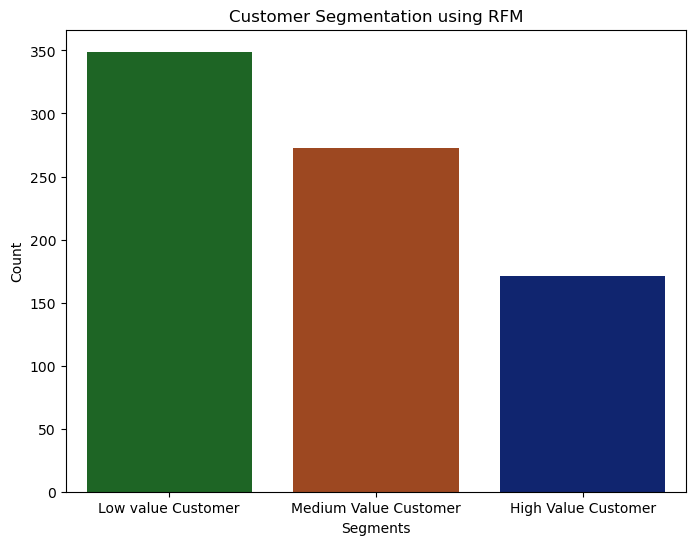

In [32]:
Customer_Segment = RFM['Customer_segment'].value_counts()
# Plotting different Customer Segments
plt.figure(figsize=(8,6))
sns.barplot(x=Customer_Segment.index, y=Customer_Segment.values, hue = Customer_Segment,  palette = 'dark', legend=False)
plt.title('Customer Segmentation using RFM')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.show()

## Conclusion: 
### This analysis provides insights into customer behavior, identifying high-value customers for targeted marketing and low-value customers for re-engagement strategies.

### Here customers are segmented into three categories:
### * Low Value - These are customers who have made infrequent purchases and their monetary value (average transaction amount) is relatively low.
### * Medium Value - These are customers who have moderate frequency, recency, and monetary value.
### * High Value - These customers are the most valuable to the business who make frequent purchases and have high monetary value.

## From this RFM anaysis we can conclude:
### * for Low Value Customer - We should encourage customers on making repeat purchases through targeted promotions and uUpsell or cross-sell to increase their average transaction value.
### * for Medium Value Customer - We should maintain engagement through regular communication and offer them personalized recommendations based on their past behavior.
### * for High Value Customer - We should offer them exclusive offers, and provide personalized experiences to foster their loyalty to retain their business.

                                                    Author: Akshat Gupta
                                                  Last Updated : 30-07-2024